# NLP Analysis of Movie Reviews
- David Atkins

In [49]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import spacy

from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.probability import FreqDist
from string import punctuation

pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")

In [8]:
#defining the spacy processing function
def spacy_process(text):
        """Lemmatize tokens, lower case, remove punctuation, spaces, and stop words"""
        doc = nlp_model(text)
        processed_doc = [token.lemma_ for token in doc if not token.is_punct and 
                         not token.is_space and not token.is_stop and 
                         not 'http' in token.lemma_ and 'www' not in token.lemma_]
        return processed_doc

### Data & Preprocessing

In [2]:
# loading data
df = pd.read_csv('Data-NLP\movie_reviews_v2.csv')
df.head(3)

,review_id,movie_id,imdb_id,original_title,review,rating
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife, the other a business executive and his wife. The businessman is rarely at home, nor is the journalist's wife - which leaves the other two at increasingly loose ends. It isn't long before a friendship develops - usually over some noodles - and though entirely platonic, their relationship becomes solid and trusting. Then, something entirely unexpected occurs that causes the two to refocus their relationship in the face of betrayal and disappointment - and well.... What helps this film stand out are the performances from both Tony Leung (""Chow Mo-wan"") and the gorgeous Maggie Cheung (""Mrs. Chan"") - it's a love story, and it burns intensely - but not physically - as their story subsumes both themselves and the audience. The film looks marvellous, is paced stylishly and uses quite a bit of Nat King Cole to set and keep the mood atmospheric, romantic and interesting. The photography offers us lingering close ups, we get a sense of them falling in love as if we, too, were undergoing the same experience and that all adds to the richness of the story. To give us a breather from the intensity, there are some fun scenes with their very close neighbours who love nothing better than to sit up all night playing mahjong!! Super film, this - flew by.",7.0
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.",9.0
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,"Made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. It's maybe not as great as I remember thinking it was when I was a little kid, but it still holds up to some degree.\r\n\r\n_Final rating:★★★ - I liked it. Would personally recommend you give it a go._",6.0


In [3]:
# number of reviews
df.shape

(8650, 6)

In [4]:
df['rating'].value_counts()

7.0     1576
6.0     1386
8.0     1259
5.0      732
9.0      616
10.0     564
4.0      514
1.0      284
3.0      254
2.0      153
7.5       27
8.5       23
6.5       22
9.5       15
0.5       10
5.5        6
3.5        4
4.5        4
1.5        3
2.5        2
Name: rating, dtype: int64

In [5]:
df.isnull().sum()

review_id            0
movie_id             0
imdb_id              0
original_title       0
review               0
rating            1196
dtype: int64

In [77]:
# making a 'rated' column for high and low
df['rated'] = pd.Series
for i in range(len(df['rating'])):
    if df['rating'][i] >= 9:
        df['rated'][i] = 'HIGH'
    elif df['rating'][i] <= 4:
        df['rated'][i] = 'LOW'
    else:
        df['rated'][i] = 'DROP'

df['rated'].value_counts(normalize=True)

LOW     0.505994
HIGH    0.494006
Name: rated, dtype: float64

In [31]:
df = df[df['rated'] != 'DROP'].reset_index(drop=True)
df['rated'].head()

0    HIGH
1     LOW
2     LOW
3    HIGH
4     LOW
Name: rated, dtype: object

In [9]:
# normalizing to all lower case
df['review'] = df['review'].str.lower()

In [40]:
# NLTK's Tweet Tokenization
tweet_tokenizer = TweetTokenizer()
df['tweet_token'] = pd.Series
for i in range(len(df['review'])):
    df['tweet_token'][i] = tweet_tokenizer.tokenize(df['review'][i])
df['tweet_token'].head(2)

0                                                                                                                                                                                                                                                                                                                                               [a, guilty, pleasure, for, me, personally, ,, as, i, love, both, ', the, great, escape, ', and, most, of, the, works, i, have, seen, ,, over, the, years, ,, from, this, rightfully-esteemed, british, animation, company, ., highly, recommended, both, for, children, and, for, adults, who, enjoy, animation, .]
1    [the, first, underwhelmed, me, ,, but, this, one, straight-up, bored, me, ., again, ,, of, course, seeing, hunt, climb, a, mountain, without, a, harness, is, impressive, sure, ., and, i, even, quite, liked, the, idea, behind, the, villain, of, the, piece, (, though, even, that, angle, was, woefully, underdeveloped, ), ., even, setting, it, in, predo

In [13]:
# loading in SpaCy NLP
nlp_model = spacy.load('en_core_web_sm', disable=['parser','ner'])
nlp_model.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [14]:
# applying spacy_process to the text in new column
df['spacy_lemmas'] = df['review'].apply(spacy_process)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2419 entries, 1 to 8647
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       2419 non-null   object 
 1   movie_id        2419 non-null   int64  
 2   imdb_id         2419 non-null   object 
 3   original_title  2419 non-null   object 
 4   review          2419 non-null   object 
 5   rating          2419 non-null   float64
 6   rated           2419 non-null   object 
 7   tokens          2419 non-null   object 
 8   spacy_lemmas    2419 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 189.0+ KB


In [19]:
df['spacy_lemmas'].head(2)

1                                                                                                                                                                                                                                           [guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]
6    [underwhelme, straight, bore, course, see, hunt, climb, mountain, harness, impressive, sure, like, idea, villain, piece, angle, woefully, underdeveloped, set, predominantly, australia, grab, attention, say, cause, pretty, biased, come, hear, tell, mission, impossible, ii, low, point, series, encouraging, bad, know, able, rogue, nation, final, rating:, ★, ½, boring, disappointing, avoid, possible]
Name: spacy_lemmas, dtype: object

In [41]:
# making a tweet token joined string column
df['joined_token'] = pd.Series
for i in range(len(df['tweet_token'])):
    token = df['tweet_token'][i]
    df['joined_token'][i] = ' '.join(token)
df['joined_token'].head(2)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              a guilty pleasure for me personally , as i love both ' the great escape ' and most of the works i have seen , over the years , from this rightfully-esteemed british animation company . highly recommended both for children and for adults who enjoy animation .
1    the first underwhelmed me , but this one straight-up bored me . again , of course seeing hunt climb a mountain without a harness is impressive sure . and i even quite liked the idea behind the villain of the piece ( though even that angle was woefully under

In [34]:
# making a lemmas joined string column
df['joined_lemmas'] = pd.Series
for i in range(len(df['spacy_lemmas'])):
    token = df['spacy_lemmas'][i]
    df['joined_lemmas'][i] = ' '.join(token)
df['joined_lemmas'].head(2)

0                                                                                                                                                                                                             guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation
1    underwhelme straight bore course see hunt climb mountain harness impressive sure like idea villain piece angle woefully underdeveloped set predominantly australia grab attention say cause pretty biased come hear tell mission impossible ii low point series encouraging bad know able rogue nation final rating: ★ ½ boring disappointing avoid possible
Name: joined_lemmas, dtype: object

In [42]:
# save as a joblib
import joblib
fpath = 'Data-NLP/processed-reviews-hoover.joblib'
joblib.dump(df, fpath, compress=9)

['Data-NLP/processed-reviews-hoover.joblib']

### EDA & Visualization

##### Wordclouds

In [44]:
# filters
filter_high = df['rated'] == 'HIGH'
filter_low = df['rated'] == 'LOW'
filter_high.sum(), filter_low.sum()

(1195, 1224)

In [45]:
# connecting strings
high_review = " ".join(df.loc[filter_high, 'joined_lemmas'])
low_review = " ".join(df.loc[filter_low, 'joined_lemmas'])
print(high_review[:500],"\n",low_review[:500],"\n")

guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation okay admit bit easy grader come romantic comedy long witty likable character insult intelligence suitable happy ending guess end happily rom com see movie year ago forget fresh like movie plot rely huge coincidence story get sappy sentimental place predictable religion suit thing suit fine praise co write direct actress bonnie hunt support character  
 underwhelme straight bore course see hunt climb mountain harness impressive sure like idea villain piece angle woefully underdeveloped set predominantly australia grab attention say cause pretty biased come hear tell mission impossible ii low point series encouraging bad know able rogue nation final rating: ★ ½ boring disappointing avoid possible entertainign mission impossible second installment turn terrible screenwriter know fill 2 hrs action overuse heroic slow motion scene horrible need 

In [72]:
# addings custom stopwords high in both high and low ratings
stops = [*STOPWORDS, 'film', 'movie', 'watch', 'bad', 'good', 'time', 'story',
        'way', 'character', 'know','feel','go','think','see','come','people',
        'work','end','scene','thing']

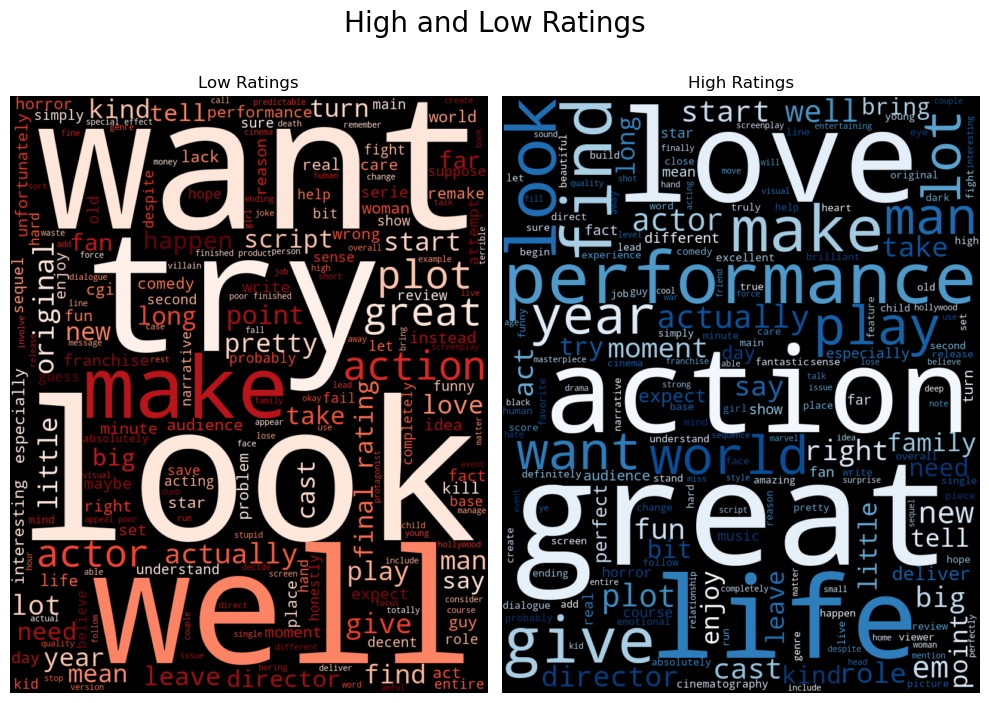

In [73]:
# creating word clouds
low_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                      stopwords=stops
                     ).generate(low_review)
high_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                       stopwords=stops
                      ).generate(high_review)
# adjusting the plot
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('High and Low Ratings', fontsize=20, y=1.05);
plt.savefig('Images/Wordcloud.png')

##### FreqDist

In [93]:
# making lists for the freq plot
high_list = df.loc[filter_high, 'spacy_lemmas'].explode().to_list()
high_dist = FreqDist(high_list)


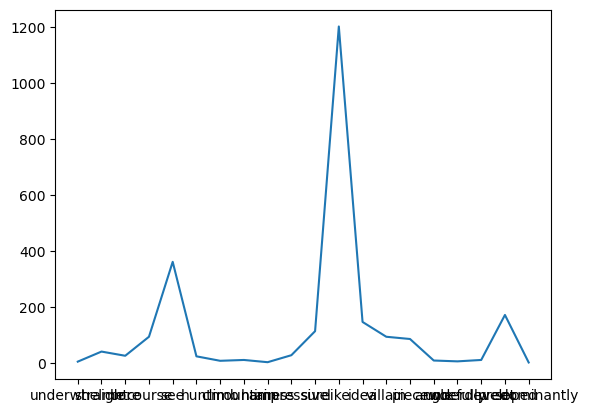

In [103]:
low_list = df.loc[filter_low, 'spacy_lemmas'].explode().to_list()
low_dist = FreqDist(low_list)

x = list(low_dist.keys())
y = list(low_dist.values())

# Plotting
fig, ax = plt.subplots()
ax.plot(x[:20], y[:20])  # Use bar plot for frequency distribution
plt.savefig('Images/low_freq_dist.png')
plt.show()

# high_dist.plot(20, title='Rated High');